In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/__notebook_source__.ipynb


In [1]:
import re
import pandas as pd 
from nltk.corpus import stopwords
import numpy as np
import sklearn
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [2]:
import numpy as np
import pandas as pd

import os
import math
import time

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.figure_factory as ff
#from plotly import graph_objs as go
#import plotly.express as px

# Below libraries are for text processing using NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

from IPython.display import HTML, Image

In [ ]:
#第一步的流程是数据获取，我们从kaggle这里找到数据集（reference要做数据集的引用）
# 提及columns，原始数据怎么怎么滴
#接下来就到数据清洗
news = pd.read_json('/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json', lines=True)
news['information'] = news[['headline', 'short_description']].apply(lambda x: ' '.join(x), axis=1) # 这步看别人的做法也是合并，我们也可以合并

In [3]:
news = pd.read_csv(r"\\filestore.soton.ac.uk\users\jz3f19\mydocuments\temp_folders\raw_news_df.csv")

In [3]:
#news_2 = pd.read_csv("/kaggle/input/middle-news-2-df/middle_news_2_df.csv") 
news_2 = pd.read_csv(r"\\filestore.soton.ac.uk\users\jz3f19\mydocuments\temp_folders\middle_news_2_df.csv") 
#用这个数据集来验证数据过少的问题
#目前找到的这个数据集有个缺点是类别太少了

In [12]:
news_2.head(100)

,Unnamed: 0,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,1,Fed official says weak data caused by weather ...,http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,1,2,Fed s Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,2,3,US open Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,3,4,Fed risks falling behind the curve Charles ...,http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,4,5,Fed s Plosser Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
...,...,...,...,...,...,...,...,...,...
95,95,96,UPDATE McDonald s US sales continue to strug...,http://www.reuters.com/article/2014/03/10/mcdo...,Reuters,b,d4lvRcSzuglGdFMmqvT6ZGcG8vDlM,www.reuters.com,1394471389416
96,96,97,McDonald s Sales Slip as Americans Eating Hab...,http://www.dailyfinance.com/2014/03/10/mcdonal...,DailyFinance,b,d4lvRcSzuglGdFMmqvT6ZGcG8vDlM,www.dailyfinance.com,1394471389602
97,97,98,Five Guys Chipotle continue to take bites out...,http://www.courierpress.com/news/2014/mar/10/f...,Evansville Courier \& Press,b,d4lvRcSzuglGdFMmqvT6ZGcG8vDlM,www.courierpress.com,1394471389786
98,98,99,McDonald s reports lower US sales amid bitter ...,http://www.nj.com/business/index.ssf/2014/03/b...,The Star-Ledger,b,d4lvRcSzuglGdFMmqvT6ZGcG8vDlM,www.nj.com,1394471389954


In [7]:
display(HTML('<span style="font-weight:bold">' + 'Table 1 - General Dataset Information'\
             + '</span>'),news_2.head(3)) 
print(f"Number of Samples: {news_2.shape[0]}")
print(f"Number of Features: {news_2.shape[1]}")
# Missing Values
aux = news_2.isnull().sum()/news_2.shape[0] * 100.00
if sum(aux) == 0:
    print("No Missing Data!")
else:
    aux = aux[aux > 0]
    aux = pd.DataFrame({'Feature': aux.index,
                    'Percent_Missing': aux.values})
    aux.sort_values('Percent_Missing', inplace=True)
    display(aux)

,Unnamed: 0,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,1,Fed official says weak data caused by weather ...,http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,1,2,Fed s Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,2,3,US open Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


Number of Samples: 422419
Number of Features: 9


,Feature,Percent_Missing
0,PUBLISHER,0.000473


In [8]:
# n = len(news_2['CATEGORY'])
# news_2['NEW_CATEGORY'] = ''
# index = 0
# for i in range(n):
#     #print(news_2['CATEGORY'][index])
#     if news_2['CATEGORY'][index] == 'b':
#         news_2['NEW_CATEGORY'][index] = 'business'
#     elif news_2['CATEGORY'][index] == 't':
#         news_2['NEW_CATEGORY'][index] = 'science and technology'
#     elif news_2['CATEGORY'][index] == 'e':
#         news_2['NEW_CATEGORY'][index] = 'entertainment' 
#     else:
#         news_2['NEW_CATEGORY'][index] = 'medicine'
#     index += 1

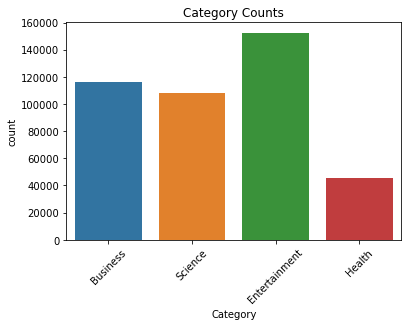

In [9]:
import seaborn as sns
# sns.set(style="darkgrid")
# ax = sns.countplot(x=news_2['CATEGORY'], data=news_2)
cat_map = {
    'b': 'Business',
    't': 'Science',
    'e': 'Entertainment',
    'm': 'Health'
}
ax = sns.countplot(news_2['CATEGORY'])
ax.set_title("Category Counts")
ax.set_xlabel("Category")
# Manipulate the labels to make them more readable
ax.set_xticklabels([cat_map[x.get_text()] for x in ax.get_xticklabels()], rotation=45)
plt.show()

In [79]:
pd.set_option('display.max_colwidth', -1)
#news.head()

In [11]:
news.describe()

,category,headline,authors,link,short_description,date,information
count,200853,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309,200365
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2015/10/willie-nelson-crusade-stop-big-pot.html,,2013-01-17 00:00:00,"Watch The Top 9 YouTube Videos Of The Week If you're looking to see the most popular YouTube videos of the week, look no further. Once again, we're bringing you the"
freq,32739,90,36620,2,19712,100,46
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00,NaN


In [12]:
# data processing
# Checking and removing all the duplicates
# 数据前期预言，就是看下有什么类型的数据，这里有重复数据，我们删掉重复数据
print("Total number of articles before removing duplicates:", news.shape[0])
news.sort_values('headline',inplace=True, ascending=False)
duplicated_articles_series = news.duplicated('headline', keep = False)
news = news[~duplicated_articles_series]
print("Total number of articles after removing duplicates:", news.shape[0])

Total number of articles before removing duplicates: 200853
Total number of articles after removing duplicates: 198627


In [13]:
#数据清洗需要提及，有哪些空值，然后我们说补回这些空值用‘’，，，， 或者说去掉这些空值
news.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
information          0
dtype: int64

In [14]:
print("Total number of articles : ", news.shape[0])
print("Total number of authors : ", news["authors"].nunique())
print("Total number of unqiue categories : ", news["category"].nunique())
#基本的eda，数据清洗的时候提及，还有后面分类要分几类

Total number of articles :  198627
Total number of authors :  27893
Total number of unqiue categories :  41


In [65]:
sns.set(style="whitegrid")
X = news["category"].value_counts().index
Y = news["category"].value_counts().values
# g = sns.catplot(x=X, y=Y, data=news, height=6, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("News probability")
print(X)

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE',
       'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION',
       'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS',
       'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE',
       'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object')


In [ ]:
fig = go.Figure([go.Bar(x=news["category"].value_counts().index, y=news["category"].value_counts().values)])
fig['layout'].update(title={"text" : 'Distribution of articles category','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Category name",yaxis_title="Number of articles")
fig.update_layout(width=800,height=700)
fig

In [4]:
# 这是明显的数据不均衡，所以我们要平衡一些类别，政治类那个太多了，可能也要over-sampling
#还有说到，分类的时候，监督学习，分什么标签影响很大之类，我这里分的也不够全面，属于人工主观分类
news['category_merged']=news['category'].replace({"HEALTHY LIVING": "WELLNESS",
"QUEER VOICES": "GROUPS VOICES",
"BUSINESS": "BUSINESS & FINANCES",
"PARENTS": "PARENTING",
"BLACK VOICES": "GROUPS VOICES",
"THE WORLDPOST": "WORLD NEWS",
"STYLE": "STYLE & BEAUTY",
"GREEN": "ENVIRONMENT",
"TASTE": "FOOD & DRINK",
"WORLDPOST": "WORLD NEWS",
"SCIENCE": "SCIENCE & TECH",
"TECH": "SCIENCE & TECH",
"MONEY": "BUSINESS & FINANCES",
"ARTS": "ARTS & CULTURE",
"COLLEGE": "EDUCATION",
"LATINO VOICES": "GROUPS VOICES",
"CULTURE & ARTS": "ARTS & CULTURE",
"FIFTY": "MISCELLANEOUS",
"WEDDINGS":'FAMILY',
#"WOMEN":'FAMILY',
"DIVORCE":"FAMILY",
"GOOD NEWS": "MISCELLANEOUS"})

In [67]:
news.head()

,Unnamed: 0,category,headline,authors,link,short_description,date,information,category_merged
0,0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.",CRIME
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.,ENTERTAINMENT
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,ENTERTAINMENT
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,ENTERTAINMENT
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26,"Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",ENTERTAINMENT


In [ ]:
#合并后
fig = go.Figure([go.Bar(x=news["category_merged"].value_counts().index, y=news["category_merged"].value_counts().values)])
fig['layout'].update(title={"text" : 'Distribution of articles category','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Category name",yaxis_title="Number of articles")
fig.update_layout(width=800,height=700)
fig

In [ ]:
#要说政治的数据集过多，validation的时候要验证是否会过拟合
#这里的数据集是文章的标题跟内容概述，属于短文本分类
#看情况，是否需要做个短文本分类vs长文本分类
#这里不做中文分类了，时间不够
# news['category_merged']=news['category'].replace(
# {"ENTERTAINMENT": "COMEDY", # 具体分类还可以再细化一下，先完成流程再优化这里
 
# })

In [5]:
news.drop(news[(news['authors'] == '') & (news['short_description'] == '' )].index, inplace=True)
#news_2.drop(news_2[[news_2.TITLE] == ''].index, inplace=True)没有空的

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
news['category_merged'].value_counts().plot.pie( autopct = '%1.1f%%')
#政治与娱乐的占比过大，training容易过拟合，数据少的可能欠拟合

# k-flod的时候
#分类的时候后，training set， validation set， test set这样来弄

In [52]:
#尽管没啥用，但是这些都可以统计出来
total_authors = news.authors.nunique()
news_counts = news.shape[0]
print('Total Number of authors : ', total_authors)

print('avg articles written by per author: ' + str(news_counts//total_authors))
print('Total news counts : ' + str(news_counts))
#写到特征工程里面去

Total Number of authors :  27879
avg articles written by per author: 7
Total news counts : 195601


In [53]:
authors_news_counts = news.authors.value_counts()
sum_contribution = 0
author_count = 0
for author_contribution in authors_news_counts:
    author_count += 1
    if author_contribution < 80:
        break
    sum_contribution += author_contribution
print('{} of news is contributed by {} authors i.e  {} % of news is contributed by {} % of authors'.
      format(sum_contribution, author_count, format((sum_contribution*100/news_counts), '.2f'), format((author_count*100/total_authors), '.2f')))
# If all authors are writing only of few categories of news then we can consider the author feature as well for modeling.

79690 of news is contributed by 257 authors i.e  40.74 % of news is contributed by 0.92 % of authors


In [ ]:
#统计前十的作者
news.authors.value_counts()[0:10]

In [ ]:
#举例子，这个作者分别写了哪些哪些文章啊
author_name = 'Lee Moran'
particular_author_news = news[news['authors'] == author_name]
df = particular_author_news.groupby(by='category_merged')['information'].count()
df

In [ ]:
#这个作家的文章饼图，可以说明他是什么板块的编辑，主攻写什么类型的文章
fig, ax = plt.subplots(1, 1, figsize=(20,20))
df.plot.pie( autopct = '%1.1f%%')

In [ ]:
'''
在做训练之前，我们还可以对模型进行词统计，统计最常见出现的词，二元词，三元词，但是对训练没啥卵用，但是可以画多几个图
'''

In [ ]:
'''
https://www.kaggle.com/xhlulu/plotly-express-tests/notebook
画酷炫的图

下面就是算法对比了
'''

In [ ]:
print(X_train)

In [6]:
#下面分训练集跟测试机
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(news[['information', 'authors']], news['category_merged'], test_size=0.33)

In [103]:
mapper = {}

for i,cat in enumerate(news_2["CATEGORY"].unique()):
        mapper[cat] = i

news_2["category_target"] = news_2["CATEGORY"].map(mapper)
#news_2.head()

In [96]:
_, _, temp_y_train, temp_y_val = sklearn.model_selection.train_test_split(news_2[['TITLE', 'PUBLISHER']], news_2['category_target'], test_size=0.2)

In [97]:
temp_y_train

76532     0
157474    2
195569    0
261179    2
374906    2
         ..
212121    0
385799    2
194484    2
320355    2
21105     0
Name: category_target, Length: 326476, dtype: int64

In [7]:
# Convert pandas series into numpy array
X_train = np.array(X_train);
X_test = np.array(X_test);
Y_train = np.array(Y_train);
Y_test = np.array(Y_test);
cleanHeadlines_train = [] 

cleanHeadlines_test = [] 
number_reviews_train = len(X_train) 
number_reviews_test = len(X_test) 

In [8]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmetizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def isnumber(string):
    try:
        float(string)
        return True
    except:
        return False

def get_words(headlines_list):
    headlines = headlines_list[0]
    #print(headlines_list[1])
    #    "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+
    #author_names = [x for x in headlines_list[1].lower().replace('and',',').replace('...','').replace(' ', '').split(',') if x != '' or x is None]
    
    author_names = []
    
    if headlines_list[1] is not None and headlines_list[1] != '':
        if not isnumber(headlines_list[1]):
            temp_names = headlines_list[1].lower().replace('and', ',').replace('...','').replace(' ', '').replace("\\",' ').replace('-',' ').replace('.', '').split(',')
            for name in temp_names:
                if name != '' and name is not None:
                    author_names.append(name)
    
    headlines_only_letters = re.sub('[^a-zA-Z]', ' ', headlines)
    
    #headlines_only_letters = word_clean(headlines[:100])
    #print(headlines_only_letters[:100].lower())
    words = nltk.word_tokenize(headlines_only_letters.lower())
    words = [word for word in words if len(word) > 2]
    stops = set(stopwords.words('english'))
    meaningful_words = [lemmetizer.lemmatize(w) for w in words if w not in stops]
    return ' '.join(meaningful_words + author_names) # it is really strange to add authors name i think

def word_clean(texts):
    n = len(texts)
    #re.sub('[^a-zA-Z]', ' ', headlines)
    for i in range(n):
        text = texts[i]
        text = str(text).lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub('@', '', text)
        texts[i] = text
    return texts

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#
for i in range(0,number_reviews_train):
    
    cleanHeadline = get_words(X_train[i]) #这步清理出来的数据可能还会有字符啥的，还有些没意义的词
    cleanHeadlines_train.append(cleanHeadline)
    
# add author to headline, not sure whether its useful

In [10]:
for i in range(0,number_reviews_test):
    cleanHeadline = get_words(X_test[i]) #Processing the data and getting words with no special characters, numbers or html tags
    cleanHeadlines_test.append( cleanHeadline )

In [11]:
# cleanHeadlines_train = [x for x in cleanHeadlines_train if x != '' and x is not None]
# cleanHeadlines_test = [x for x in cleanHeadlines_test if x != '' and x is not None]
print(cleanHeadlines_test[:10])

['myth trash dress photo part bride opting take additional plunge unknown big day trash dress surf dress photo increasingly demand way keep celebration going well beyond wedding day chelseabond contributor\ninternationaljewelrydesigner|entrepreneur chelseabondje', 'john bel edward new attacking david vitter subtle guess aspect david vitter checkered past edward emphasizing come guess jasonlinkins', 'amsterdam bike ever city made cycling amsterdam mile safe bike lane flat canal skirting road jetsetter contributor\njetsetteristhego tobr fortravelerswithdiscerningtas', 'levar burton say time right root remake set date yet new root air', 'lost weight jim fisher made portion control priority lost pound weight pound huffington post publishes photograph submitted reader check', 'gossip killing relationship work life coach client often complain people life always trying fix fixer may well meaning sometimes reliance fixing people problem bolster self worth identity lisahaisha contributor\ncreat

In [12]:
vectorize = sklearn.feature_extraction.text.TfidfVectorizer(analyzer = "word", max_features=30000)
tfidwords_train = vectorize.fit_transform(cleanHeadlines_train)
X_train = tfidwords_train.toarray()

In [13]:
tfidwords_test = vectorize.transform(cleanHeadlines_test)
X_test = tfidwords_test.toarray()

In [14]:
X_train[:1]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.svm import LinearSVC
#不要跑这段，内存不够
model = LinearSVC()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_predict)*100
print(format(accuracy, '.2f'))

77.56


In [18]:
#不要一次性跑完，机器不够，会崩， LR非常耗时
#大概会跑40mins
logistic_Regression = LogisticRegression()
logistic_Regression.fit(X_train,Y_train)
Y_predict = logistic_Regression.predict(X_test)
accuracy = accuracy_score(Y_test,Y_predict)*100
print(format(accuracy, '.2f'))

75.90


In [19]:
from sklearn.ensemble import BaggingClassifier
#不要跑这段，内存不够
model = BaggingClassifier(random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('Accuracy of bagged KNN is :',accuracy_score(prediction, Y_test))

MemoryError: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#不要跑这段，内存不够
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction_decision_tree = model.predict(X_test)
print('The accuracy of Decision Tree is', accuracy_score(prediction_decision_tree, Y_test))

In [100]:
from sklearn.tree import DecisionTreeClassifier
#不要跑这段，内存不够
model = DecisionTreeClassifier()
model.fit(x_train, temp_y_train)
prediction_decision_tree = model.predict(x_val)
print('The accuracy of Decision Tree is', accuracy_score(prediction_decision_tree, temp_y_val))

The accuracy of Decision Tree is 0.28597507933201827


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#不要跑这段，内存不够
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
prediction_knn = model.predict(X_test)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction_knn, Y_test))


In [ ]:
from sklearn.svm import SVC
#不要跑这段，内存不够
model = SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, Y_train)
predict_rsvm = model.predict(X_test)
print('Predict accuracy is ',accuracy_score(predict_rsvm,Y_test))


In [ ]:
#以下说的是用深度学习方式跑模型，上面的是baseline

In [15]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
#写遇到的障碍时，可以参考这篇文章
#https://zhuanlan.zhihu.com/p/35586145
news.information[:10]

36290     “We Shall Overcomb!” Say The 100,000 Marching Against Trump In London Thousands of activists descended on London to march for women’s rights, diversity and equality last Saturday. The Women’s 
21194     “To The Bone” Didn’t Teach Me Glamour. It Taught Me Respect. Oftentimes, films or TV shows about eating disorders try to convince victims to stop by showing them their sickly thin appearance  
29672     “I’m Sorry"--The Two Tragically Forgotten Words In Customer Service Unfortunately, I was one of those frustrated passengers caught in the midst of the recent spring break travel nightmare that
199048    ‘Your Divorce Ruined My Life' What To Do When Your Child Blames You It was Sunday night and Lucas’s mother had had it with her 15-year-old son. “I am just sick of this. Look at this mess. I   
193783    ‘You Better Sit Down,' By The Civilians, At Flea Theater The Civilians, the enterprising troupe specializing in documentary theater drawn from interviews, takes its tape recorder

In [19]:
def list2str(words):
    tempstr = ''
    for word in words:
        tempstr += word + ' ' #这种拼接效率低
    return tempstr

In [ ]:
index = 0 #不要轻易跑这段代码，分词跟清洗会很久很久
for text in news_2.TITLE:
    temp = re.sub('[^a-zA-Z]', ' ', text)
    news_2.TITLE[index] = temp
    index += 1
    
news_2.to_csv('middle_news_2_df.csv')

In [ ]:
index = 0
for text in news.information:
    temp = re.sub('[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(temp.lower())#其实就去掉了个空格，有没有都没啥卵用，耗时
    words = [word for word in words if len(word) > 2]
    news.information[index] = list2str(words)
    index += 1

In [ ]:
news.information[:100]

In [ ]:

print(len(news_2))
news['words'] = ''
print(len(news.words))

In [ ]:
news_2.head()

In [ ]:
news['text'] = news.headline + " " + news.short_description
# tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news.text)
tempX = tokenizer.texts_to_sequences(news.text)
print(len(tempX))

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2.TITLE)
news_2_X = tokenizer.texts_to_sequences(news_2.TITLE)


In [ ]:
#上面是传统机器学习的做法
#下面可以扯高级点的词嵌入的做法， glove embedding，不过参考别人做的准确度不搞，数据集不够或者是分词不够好

#没清洗掉没意义的字符会对准确率产生影响

#news['text'] = news.headline + " " + news.short_description
# tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news.information)
X = tokenizer.texts_to_sequences(news.information)
print(len(X))

In [ ]:
print(news_2_X[:10])

In [ ]:
news['words'] = X
news['word_length'] = news_2.words.apply(lambda i: len(i))
news = news[news.word_length >= 5]

In [6]:
news_2['words'] = news_2_X
news_2['word_length'] = news_2.words.apply(lambda i: len(i))
news_2 = news_2[news_2.word_length >= 5]

In [22]:
news.word_length.describe()

AttributeError: 'DataFrame' object has no attribute 'word_length'

In [ ]:
# news.head()
# news.to_csv('middle_news_df.csv')

In [ ]:
categories = news.groupby('category_merged').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

news['c2id'] = news['category_merged'].apply(lambda x: category_int[x])

In [7]:
news_2_categories = news_2.groupby('CATEGORY').size().index.tolist()
news_2_category_int = {}
news_2_int_category = {}
for i, k in enumerate(news_2_categories):
    news_2_category_int.update({k:i})
    news_2_int_category.update({i:k})

news_2['c2id'] = news_2['CATEGORY'].apply(lambda x: news_2_category_int[x])

In [21]:
news_2.c2id[:10000]

0        0
1        0
2        0
3        0
4        0
        ..
10299    3
10300    3
10301    3
10302    3
10303    3
Name: c2id, Length: 10000, dtype: int64

In [65]:
index = 0

for c in news_2['CATEGORY']:
    if news_2['CATEGORY'][index] == 'm':
        print(c)
        break
    index += 1

KeyError: 44

In [9]:
#用词包做词嵌入，事先导入别人预训练好的词向量模型来做词嵌入
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embeddings_index = {}
f = open('C:\\Users\\jz3f19\\Downloads\\glove.6B.100d.txt\\glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 49616 unique tokens.
Total 400000 word vectors.


In [10]:
# using 50 for padding length

maxlen = 50
#X = list(sequence.pad_sequences(news.words, maxlen=maxlen))
X_2 = list(sequence.pad_sequences(news_2.words, maxlen=maxlen))
#做词嵌入，构建模型，用默认参数
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

W0508 13:11:17.451857 40180 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
#同样是k-flod分数据集，这步要严谨点，我不是很懂为什么这样分，seed是超参数
X = np.array(X_2)
Y = np_utils.to_categorical(list(news_2.c2id))#创造了y值，这步我没想到
# and split to training set and validation set
seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [12]:
# 构建模型TextCNN
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

int_category = news_2_int_category
outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

W0508 13:11:17.722096 40180 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0508 13:11:17.815843 40180 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0508 13:11:17.948515 40180 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0508 13:11:17.950501 40180 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0508 13:11:17.956486 40180 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      4961700     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 64)       12864       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 50, 64)       19264       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

In [30]:
textcnn_history = TextCNN.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

W0508 01:00:49.054414 38412 deprecation.py:323] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 326476 samples, validate on 81619 samples
Epoch 1/20
326476/326476 [==============================] - 20s 60us/step - loss: 0.4408 - acc: 0.8390 - val_loss: 0.3131 - val_acc: 0.8900
Epoch 2/20
326476/326476 [==============================] - 13s 41us/step - loss: 0.3613 - acc: 0.8716 - val_loss: 0.2885 - val_acc: 0.8990
Epoch 3/20
326476/326476 [==============================] - 13s 41us/step - loss: 0.3434 - acc: 0.8786 - val_loss: 0.2673 - val_acc: 0.9083
Epoch 4/20
326476/326476 [==============================] - 14s 42us/step - loss: 0.3306 - acc: 0.8834 - val_loss: 0.2576 - val_acc: 0.9113
Epoch 5/20
326476/326476 [==============================] - 14s 42us/step - loss: 0.3234 - acc: 0.8870 - val_loss: 0.2519 - val_acc: 0.9142
Epoch 6/20
326476/326476 [==============================] - 14s 42us/step - loss: 0.3181 - acc: 0.8888 - val_loss: 0.2477 - val_acc: 0.9144
Epoch 7/20
326476/326476 [==============================] - 14s 42us/step - loss: 0.3121 - acc: 0.8908 - val_

In [31]:
from keras.models import load_model

accr = TextCNN.evaluate(x_val,y_val)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

81619/81619 [==============================] - 4s 46us/step
Test set
  Loss: 0.221
  Accuracy: 0.925


In [32]:
TextCNN.save('textcnn_model.h5')

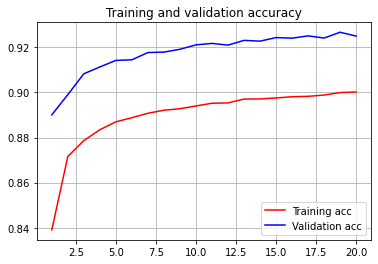

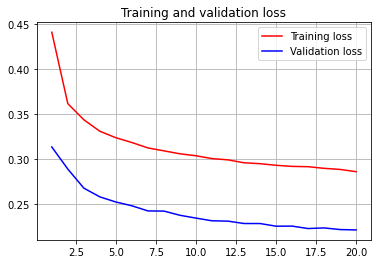

In [36]:
#这步会有loss的轨迹图出来，要放在report上
acc = textcnn_history.history['acc']
val_acc = textcnn_history.history['val_acc']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.grid(True)
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.grid(True)
plt.show()

#为什么复杂神经网络的预测效果会比普通的线性回顾要差？

In [37]:
# Bidrectional LSTM with convolution
# from https://www.kaggle.com/eashish/bidirectional-gru-with-convolution

inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

BiGRU.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      4961700     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 100)      0           embedding_1[1][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 256)      175872      spatial_dropout1d_1[0][0]        
__________________________________________________________________________________________________
conv1d_4 (

In [38]:
# training takes lots of time
bigru_history = BiGRU.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Train on 326476 samples, validate on 81619 samples
Epoch 1/20
326476/326476 [==============================] - 260s 795us/step - loss: 0.3435 - acc: 0.8748 - val_loss: 0.2239 - val_acc: 0.9206
Epoch 2/20
326476/326476 [==============================] - 272s 832us/step - loss: 0.2441 - acc: 0.9132 - val_loss: 0.1942 - val_acc: 0.9321
Epoch 3/20
326476/326476 [==============================] - 270s 828us/step - loss: 0.2144 - acc: 0.9238 - val_loss: 0.1741 - val_acc: 0.9403
Epoch 4/20
326476/326476 [==============================] - 263s 804us/step - loss: 0.1969 - acc: 0.9301 - val_loss: 0.1698 - val_acc: 0.9419
Epoch 5/20
326476/326476 [==============================] - 267s 818us/step - loss: 0.1856 - acc: 0.9344 - val_loss: 0.1616 - val_acc: 0.9454
Epoch 6/20
326476/326476 [==============================] - 267s 819us/step - loss: 0.1781 - acc: 0.9368 - val_loss: 0.1548 - val_acc: 0.9464
Epoch 7/20
326476/326476 [==============================] - 267s 818us/step - loss: 0.1725 - acc:

In [39]:
BiGRU.save('GRU.h5')



In [ ]:
bigru_history.history

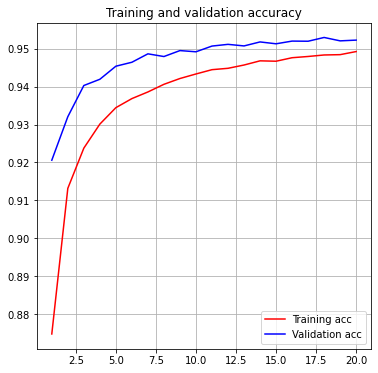

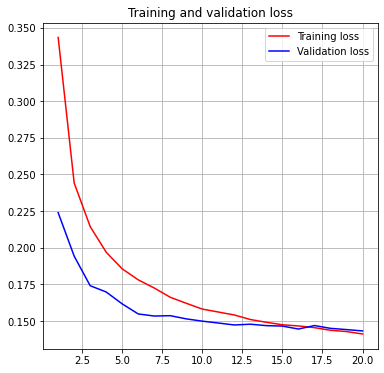

In [40]:
# Bidrectional LSTM with convolution这个模型的收敛曲线
plt.rcParams['figure.figsize'] = (6,6)

acc = bigru_history.history['acc']
val_acc = bigru_history.history['val_acc']
loss = bigru_history.history['loss']
val_loss = bigru_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.grid(True)
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        #keras版本功能冲突，降低版本       
#         self.kernel = self.add_weight(shape=(self.input_dim, self.units),
#         name='kernel',
#         initializer=self.kernel_initializer,
#         regularizer=self.kernel_regularizer,
#         constraint=self.kernel_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        print(self.W_constraint)
        print('{}_W'.format(self.name))
        print(self.W_regularizer)
        print((input_shape[-1],))
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    

lstm_layer = LSTM(300, dropout=0.25, recurrent_dropout=0.25, return_sequences=True)

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = lstm_layer(embedding)
x = Dropout(0.25)(x)
print(x)
merged = Attention(maxlen)(x)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = BatchNormalization()(merged)
outp = Dense(len(int_category), activation='softmax')(merged)

AttentionLSTM = Model(inputs=inp, outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()

Tensor("dropout_5/cond/Merge:0", shape=(?, ?, 300), dtype=float32)
None
attention_1_W
None
(300,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 100)           4961700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 300)           481200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 300)           0         
_________________________________________________________________
attention_1 (Attention)      (None, 300)               350       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               77056     
____________________________________________

In [42]:
attlstm_history = AttentionLSTM.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))



Train on 326476 samples, validate on 81619 samples
Epoch 1/20
326476/326476 [==============================] - 221s 676us/step - loss: 0.3555 - acc: 0.8706 - val_loss: 0.2358 - val_acc: 0.9156
Epoch 2/20
326476/326476 [==============================] - 219s 670us/step - loss: 0.2465 - acc: 0.9122 - val_loss: 0.1879 - val_acc: 0.9339
Epoch 3/20
326476/326476 [==============================] - 219s 671us/step - loss: 0.2109 - acc: 0.9251 - val_loss: 0.1700 - val_acc: 0.9402
Epoch 4/20
326476/326476 [==============================] - 216s 662us/step - loss: 0.1919 - acc: 0.9322 - val_loss: 0.1564 - val_acc: 0.9458
Epoch 5/20
326476/326476 [==============================] - 216s 662us/step - loss: 0.1769 - acc: 0.9377 - val_loss: 0.1506 - val_acc: 0.9475
Epoch 6/20
326476/326476 [==============================] - 216s 662us/step - loss: 0.1669 - acc: 0.9409 - val_loss: 0.1427 - val_acc: 0.9511
Epoch 7/20
326476/326476 [==============================] - 216s 662us/step - loss: 0.1601 - acc:

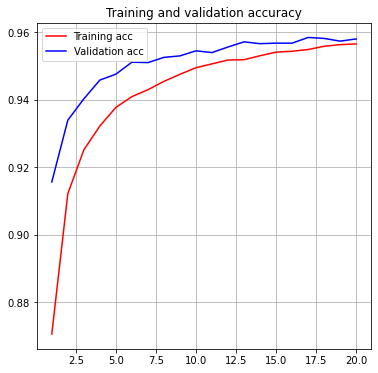

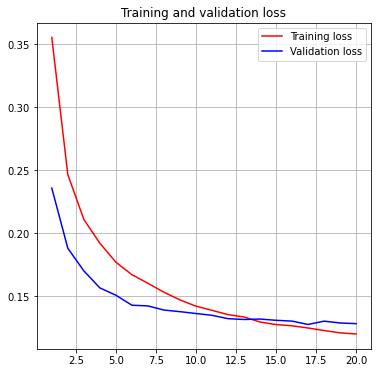

In [43]:
acc = attlstm_history.history['acc']
val_acc = attlstm_history.history['val_acc']
loss = attlstm_history.history['loss']
val_loss = attlstm_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.grid(True)
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
AttentionLSTM.save('attention.h5')

In [45]:
#confusion matrix
predicted = AttentionLSTM.predict(x_val)
cm = pd.DataFrame(confusion_matrix(y_val.argmax(axis=1), predicted.argmax(axis=1)))
from IPython.display import display
pd.options.display.max_columns = None
display(cm)

,0,1,2,3
0,20732,268,193,915
1,198,29053,86,205
2,189,150,8500,106
3,802,255,63,19904


In [46]:
#评估准确度
def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)
print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))
print("model LSTM with Attention:       %.6f" % evaluate_accuracy(AttentionLSTM))

model TextCNN accuracy:          0.924956
model Bidirectional GRU + Conv:  0.952229
model LSTM with Attention:       0.957975


In [47]:
#做到这步其实就是为了扯个模型融合的问题，虽然上面准确度很低，但是可以用别的高准确度模型来融合，这个应该会加分不少
def evaluate_accuracy_ensemble(models):
    res = np.zeros(shape=y_val.shape)
    for model in models:
        predicted = model.predict(x_val)
        res += predicted
    res /= len(models)
    diff = y_val.argmax(axis=-1) - res.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)

#模型融合前的分数是多少，融合之后的提升又是多少
print(evaluate_accuracy_ensemble([TextCNN, BiGRU, AttentionLSTM]))


0.9572771045957437


In [13]:
TextCNN.load_weights("textcnn_model.h5")
accr = TextCNN.evaluate(x_val,y_val)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

81619/81619 [==============================] - 6s 72us/step
Test set
  Loss: 0.221
  Accuracy: 0.925


In [80]:
news_2[news_2['CATEGORY'] == 'm']

,Unnamed: 0,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,words,word_length,c2id
4207,4207,4208,Grown ups Put down the smartphones at mealtime,http://www.ketknbc.com/news/grown-ups-put-down-the-smartphones-at-mealtime,KETK,m,dZphfxYr-HPiv2MLDkthjDyocSQCM,www.ketknbc.com,1394547690684,"[2576, 1881, 1103, 90, 3, 1478, 12, 16710]",8,2
4208,4208,4209,Cellphone addiction may damage parent child bond Study,http://gadgets.ndtv.com/mobiles/news/cellphone-addiction-may-damage-parent-child-bond-study-494397,NDTV,m,dZphfxYr-HPiv2MLDkthjDyocSQCM,gadgets.ndtv.com,1394547690827,"[4248, 5131, 33, 2651, 4474, 663, 1128, 78]",8,2
4209,4209,4210,Parents won t stop using smartphones even while eating with kids,http://www.mnn.com/family/family-activities/stories/parents-wont-stop-using-smartphones-even-while-eating-with-kids,Mother Nature Network,m,dZphfxYr-HPiv2MLDkthjDyocSQCM,www.mnn.com,1394547691052,"[1328, 353, 21, 488, 841, 1478, 758, 603, 1619, 10, 414]",11,2
4210,4210,4211,Smartphones making parents ignore their kids,http://timesofindia.indiatimes.com/life-style/relationships/parenting/Smartphones-making-parents-ignore-their-kids/articleshow/31850683.cms,Times of India,m,dZphfxYr-HPiv2MLDkthjDyocSQCM,timesofindia.indiatimes.com,1394547691288,"[1478, 804, 1328, 4750, 239, 414]",6,2
4211,4211,4212,Smartphones can loosen emotional bonding with your children Study,http://www.utahpeoplespost.com/2014/03/smartphones-can-loosen-emotional-bonding-with-your-children-study/,The Utah People's Post,m,dZphfxYr-HPiv2MLDkthjDyocSQCM,www.utahpeoplespost.com,1394547691482,"[1478, 77, 14869, 1931, 16711, 10, 52, 504, 78]",9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
422414,422414,422933,Surgeons to remove year old s rib to rebuild damaged throat CBS,http://www.cbs3springfield.com/story/26378648/surgeons-removed-4-year-olds-rib-to-rebuild-his-damaged-throat,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229190251,"[10021, 1, 2709, 65, 316, 2, 16383, 1, 10573, 8264, 4494, 1295]",12,2
422415,422415,422934,Boy to have surgery on esophagus after battery burns hole in throat,http://www.wlwt.com/news/boy-to-have-surgery-on-esophagus-after-battery-burns-hole-in-throat/27741396,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,1409229190508,"[851, 1, 87, 1867, 7, 49616, 18, 1079, 7353, 3316, 4, 4494]",12,2
422416,422416,422935,Child who swallowed battery to have reconstructive surgery at Cincinnati,http://www.newsnet5.com/news/local-news/child-who-swallowed-battery-to-have-reconstructive-surgery-at-cincinnati-childrens-hospital,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,1409229190771,"[663, 82, 14273, 1079, 1, 87, 18996, 1867, 12, 9222]",10,2
422417,422417,422936,Phoenix boy undergoes surgery to repair throat damage WFSB Connecticut,http://www.wfsb.com/story/26368078/phoenix-boy-undergoes-surgery-to-repair-throat-damage-from-button-battery,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,1409229191071,"[5172, 851, 8580, 1867, 1, 4655, 4494, 2651, 5994, 3524]",10,2


In [85]:
max_len=50
txt = ["Boy to have surgery on esophagus after battery burns hole in throat"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = TextCNN.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, np.argmax(pred))

[[7.1648472e-05 7.4147754e-03 9.9238878e-01 1.2481149e-04]] 2


In [73]:
from keras import metrics
#use another evaluation method
TextCNN.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [78]:
textcnn_history = TextCNN.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Train on 326476 samples, validate on 81619 samples
Epoch 1/20
326476/326476 [==============================] - 11s 34us/step - loss: 0.0360 - mean_absolute_error: 0.0730 - categorical_accuracy: 0.9032 - val_loss: 0.0280 - val_mean_absolute_error: 0.0587 - val_categorical_accuracy: 0.9260
Epoch 2/20
326476/326476 [==============================] - 10s 32us/step - loss: 0.0357 - mean_absolute_error: 0.0717 - categorical_accuracy: 0.9035 - val_loss: 0.0279 - val_mean_absolute_error: 0.0579 - val_categorical_accuracy: 0.9262
Epoch 3/20
326476/326476 [==============================] - 10s 32us/step - loss: 0.0356 - mean_absolute_error: 0.0709 - categorical_accuracy: 0.9039 - val_loss: 0.0278 - val_mean_absolute_error: 0.0574 - val_categorical_accuracy: 0.9263
Epoch 4/20
326476/326476 [==============================] - 10s 32us/step - loss: 0.0354 - mean_absolute_error: 0.0702 - categorical_accuracy: 0.9046 - val_loss: 0.0278 - val_mean_absolute_error: 0.0570 - val_categorical_accuracy: 0.92

In [86]:
#now, we gonna to use another model to evaluate our model

In [94]:
from keras.utils.np_utils import to_categorical
num_of_categories = 45000
shuffled = news_2.reindex(np.random.permutation(news_2.index))
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
concated = pd.concat([e,b,t,m], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0


concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=4)
print(labels[:10])
if 'CATEGORY' in concated.keys():
    concated.drop(['CATEGORY'], axis=1)

41516     0
12655     0
4345      0
135227    3
45467     1
14016     0
140740    3
65308     1
95331     2
89817     1
Name: LABEL, dtype: int64
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [95]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['TITLE'].values)
sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 36766 unique tokens.


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [99]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))
from keras.callbacks import EarlyStopping
epochs = 20
emb_dim = 128
batch_size = 256
labels[:2]


model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((134379, 130), (134379, 4), (44793, 130), (44793, 4))
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 130, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 1,073,668
Trainable params: 1,073,668
Non-trainable params: 0
_________________________________________________________________
None


W0508 14:40:11.947212 40180 deprecation.py:323] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 107503 samples, validate on 26876 samples
Epoch 1/20
107503/107503 [==============================] - 78s 728us/step - loss: 0.8624 - acc: 0.6465 - val_loss: 0.3082 - val_acc: 0.8956
Epoch 2/20
107503/107503 [==============================] - 77s 719us/step - loss: 0.3690 - acc: 0.8732 - val_loss: 0.2374 - val_acc: 0.9202
Epoch 3/20
107503/107503 [==============================] - 77s 721us/step - loss: 0.2929 - acc: 0.9015 - val_loss: 0.2137 - val_acc: 0.9270
Epoch 4/20
107503/107503 [==============================] - 78s 724us/step - loss: 0.2576 - acc: 0.9142 - val_loss: 0.2039 - val_acc: 0.9292
Epoch 5/20
107503/107503 [==============================] - 78s 722us/step - loss: 0.2371 - acc: 0.9206 - val_loss: 0.1988 - val_acc: 0.9319
Epoch 6/20
107503/107503 [==============================] - 77s 720us/step - loss: 0.2227 - acc: 0.9263 - val_loss: 0.1944 - val_acc: 0.9334
Epoch 7/20
107503/107503 [==============================] - 78s 722us/step - loss: 0.2124 - acc: 0.9290

In [87]:
#https://www.kaggle.com/alfarias/huffpost-news-classification-with-distilbert
#https://www.kaggle.com/vikashrajluhaniwal/recommending-news-articles-based-on-read-articles

In [88]:
#下面做长文本的处理流程，上面的预测应该ok了，也可以扯cnn来处理，看有没有时间弄
#https://www.kaggle.com/voyager2511/bbc-text-categorization/edit

In [100]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

44793/44793 [==============================] - 118s 3ms/step
Test set
  Loss: 0.204
  Accuracy: 0.934


In [104]:
max_len=50
txt = ["Boy to have surgery on esophagus after battery burns hole in throat"]
txt = ['Regular fast food eating linked to fertility issues in women']
txt = ['Coronavirus: Sickest patients face long recovery']
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = TextCNN.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, np.argmax(pred))

[[0.00100449 0.00321618 0.00470354 0.9910759 ]] 3
